In [1]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
import numpy as np 
import seaborn as sns 
from sklearn.linear_model import LinearRegression as lrs 

In [2]:
# Import duckdb to use SQL query
import duckdb as dkb

In [3]:
# Load the data csv file
data = pd.read_csv(r"survey_results_public.csv")
data.head(5)

C:\Users\huysi\AppData\Local\Temp\ipykernel_7040\691958225.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"survey_results_public.csv")


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [4]:
# Query Number of Responses by Age with Duckdb
query1 = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', ' >=65') AS Age, count(ResponseID) as 'Number of Responses'
    from data
    where Age != 'Prefer not to say'
    group by Age
    order by Age desc
        """

con = dkb.connect()
result1 = con.sql(query1).df()
result1

,Age,Number of Responses
0,55-64,2626
1,45-54,6265
2,35-44,13232
3,25-34,16485
4,18-24,9195
5,>=65,942


In [5]:
# Add labels to attributes
labels = result1['Age']
size = result1['Number of Responses']

In [6]:
text_properties = {
    'fontsize': 16,      # Increase font size
    'fontweight': 'semi-bold' # Set font weight
}

# Customize wedge (slice) properties (for borders)
wedge_properties = {
    'linewidth': 0.4,        # Set border width
    'edgecolor': 'black' # Set border color
}

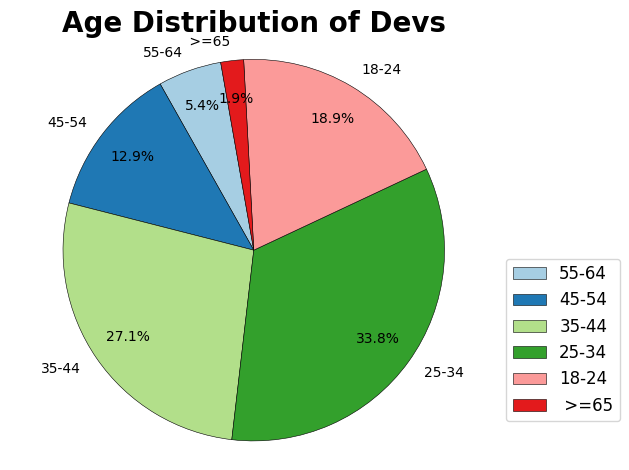

In [7]:
plt.Figure(figsize=(10,8))
plt.pie(size, labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8, 
        startangle=100, 
        colors=plt.cm.Paired.colors,
        wedgeprops=wedge_properties)
plt.axis('equal')
plt.title('Age Distribution of Devs', fontsize = 20, fontweight = 'bold')
plt.legend(loc ='best',
           bbox_to_anchor=(1, 0.5), 
           fontsize='large')
plt.tight_layout()
plt.show()

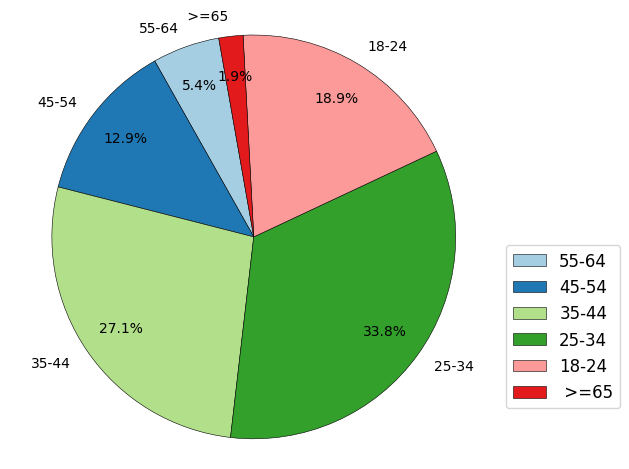

In [8]:
plt.Figure(figsize=(10,8))
plt.pie(size, labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8, 
        startangle=100, 
        colors=plt.cm.Paired.colors,
        wedgeprops=wedge_properties)
plt.axis('equal')
plt.legend(loc ='best',
           bbox_to_anchor=(1, 0.5), 
           fontsize='large')
plt.tight_layout()
plt.show()

In [9]:
query2 = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', ' Over 65') AS Age, round(avg(WorkExp),2) as 'Avg. Years of Exp'
    from data
    where Age != 'Prefer not to say'
    and workexp < 65
    group by age
    order by avg(workexp)
"""
result2 = con.sql(query2).df()
display(result2)

,Age,Avg. Years of Exp
0,18-24,2.74
1,25-34,6.86
2,35-44,14.65
3,45-54,23.80
4,55-64,32.78
5,Over 65,40.97


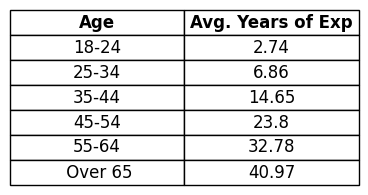

In [68]:
fig, ax = plt.subplots(figsize=(3,1))
ax.axis("off")

table = ax.table(cellText =result2.values, colLabels=result2.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)  # Adjust cell size

for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header row
        cell.get_text().set_fontweight('bold')

plt.show()

In [11]:
demoq = """
    select edlevel, count(edlevel)
    from data
    group by edlevel
"""
re_demo = con.sql(demoq).df()
re_demo

,EdLevel,count(edlevel)
0,Other (please specify):,701
1,"Secondary school (e.g. American high school, G...",3627
2,Primary/elementary school,582
3,None,0
4,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",12575
5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20247
6,"Associate degree (A.A., A.S., etc.)",1560
7,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2620
8,Some college/university study without earning ...,6175


In [12]:
con.execute("""DROP TABLE IF EXISTS data_clean;""")
con.execute("""
    CREATE TABLE data_clean AS
SELECT
    CASE
        WHEN LOWER(TRIM(edlevel)) LIKE '%associate%' THEN 'Associate''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%professional%' THEN 'Professional''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%master%' THEN 'Master''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%bachelor%' THEN 'Bachelor''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%secondary%' THEN 'Secondary school'
        WHEN LOWER(TRIM(edlevel)) LIKE '%other%' THEN 'Other'
        WHEN LOWER(TRIM(edlevel)) LIKE '%some%' THEN 'Some college without earning a degree'
        ELSE TRIM(edlevel)
    END AS edlevel,
    responseid
FROM data
""")
result3 = con.sql("""
    SELECT edlevel as 'Education', 
                  COUNT(responseid) * 100.0 / (SELECT COUNT(responseid) FROM data_clean WHERE edlevel != 'NA') AS 'Percentage of Responses'  
    FROM data_clean
    WHERE edlevel != 'NA'
    GROUP BY edlevel
    ORDER BY edlevel ASC
""").df()

res_sorted = result3.sort_values(by='Percentage of Responses', ascending = True)
res_sorted

,Education,Percentage of Responses
4,Primary/elementary school,1.210306
3,Other,1.457774
0,Associate's degree,3.244120
5,Professional's degree,5.448458
6,Secondary school,7.542579
7,Some college without earning a degree,12.841308
2,Master's degree,26.150519
1,Bachelor's degree,42.104935


In [13]:
x = res_sorted['Percentage of Responses']
y = res_sorted['Education']

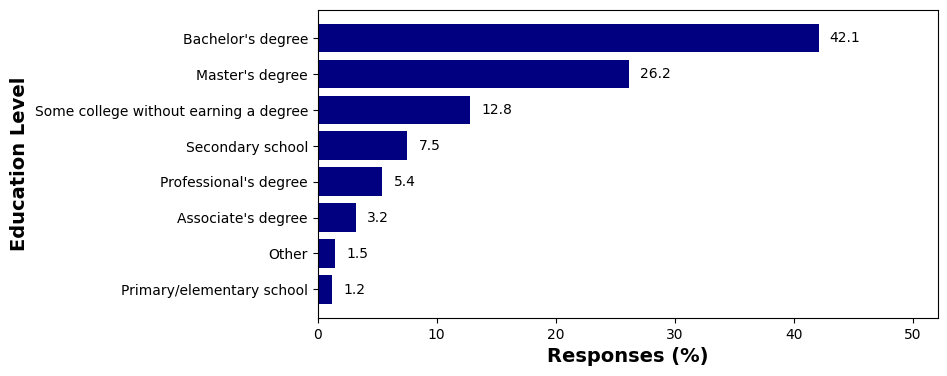

In [71]:
fig, ax = plt.subplots(figsize=(8, 4))
bars = plt.barh(y, x, color = 'navy')

ax.bar_label(bars, padding = 8, fmt='%.1f')

ax.set_xlabel('Responses (%)', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Education Level', fontsize = 14, fontweight = 'bold')

ax.set_xlim(right=res_sorted['Percentage of Responses'].max() + 10)

plt.show()

In [15]:
# Query and clean MainBranch

In [44]:
con.execute("""DROP TABLE IF EXISTS data_clean2;""")
con.execute("""
create table data_clean2 as 
    SELECT
        CASE
            WHEN LOWER(TRIM(MainBranch)) LIKE '%i am a developer by profession%' 
                                        THEN 'Professional Developer'
            WHEN LOWER(TRIM(Mainbranch)) LIKE '%i am learning to code%'
                                        THEN 'Learning to code'
            WHEN LOWER(TRIM(MainBranch)) LIKE '%i am not primarily a developer,%'
                                        THEN 'Part of work/study'
            WHEN LOWER(TRIM(MainBranch)) LIKE '%i code primarily as a hobby%'
                                        THEN 'Coding as a hobby'
            WHEN LOWER(TRIM(MainBranch)) LIKE '%i used to be a developer by profession%'
                                        THEN 'Used to be a developer'
            WHEN LOWER(TRIM(MainBranch)) LIKE '%i work with developers or%'
                                        THEN 'I work with developers'
            ELSE TRIM(MainBranch)
        END AS MainBranch,
        ResponseID
    FROM data 
    WHERE edlevel != 'NA'
    AND devtype != 'NA'
""")


query_dev_type = """
    SELECT Mainbranch as 'Main Branch',
           COUNT(responseid) * 100.0 / (SELECT COUNT(responseid) FROM data_clean2 WHERE MainBranch != 'NA') AS 'Responses (%)'  
    FROM data_clean2
    WHERE MainBranch != 'NA'
    GROUP BY MainBranch
    ORDER BY MainBranch ASC 
"""

result_branch = con.sql(query_dev_type).df()
sorted_branch = result_branch.sort_values(by='Responses (%)', ascending=True)
sorted_branch

,Main Branch,Responses (%)
1,I work with developers,1.834061
5,Used to be a developer,2.629281
0,Coding as a hobby,3.677316
2,Learning to code,4.672489
3,Part of work/study,9.977017
4,Professional Developer,77.209837


In [45]:
x1 = sorted_branch['Main Branch']
y1 = sorted_branch['Responses (%)']

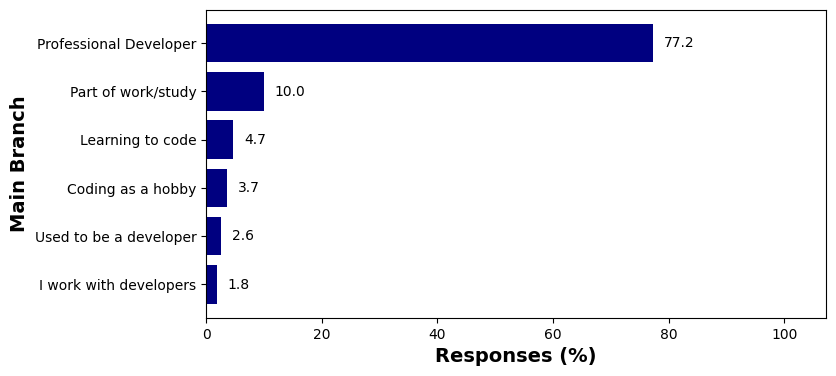

In [46]:
fig1, ax1 = plt.subplots(figsize=(8,4))

bars1 = plt.barh(x1, y1, color = 'navy')

ax1.bar_label(bars1, padding = 8, fmt='%.1f')

ax1.set_xlabel('Responses (%)', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Main Branch', fontsize = 14, fontweight = 'bold')

ax1.set_xlim(right= sorted_branch['Responses (%)'].max() + 30)

plt.show()

In [19]:
# Query and clean DevType

In [64]:
con.execute("""DROP TABLE IF EXISTS data_clean3;""")
con.execute("""
    create table data_clean3 as
    select 
        CASE
            WHEN LOWER(TRIM(DevType)) LIKE '%developer, full-stack%' 
                                            THEN 'Full-Stack'
            WHEN LOWER(TRIM(DevType)) LIKE '%developer, back-end%' 
                                            THEN 'Back-End'
            WHEN LOWER(TRIM(DevType)) LIKE '%architect, software or solutions%' 
                                            THEN 'Architect'
            WHEN LOWER(TRIM(DevType)) LIKE '%developer, front-end%' 
                                            THEN 'Front-End'
            ELSE TRIM(DevType)
        END AS DevType, 
        ResponseID 
    from data
"""
)

query_mb = """
    select DevType as 'DeveloperType',
            round(count(DevType) * 100.0 / (select count(DevType) from data_clean3 where DevType != 'NA'),1) as 'Responses (%)'
            from data_clean3
            where DevType != 'NA'
            group by DevType
            order by "Responses (%)" desc
"""

result_mb = con.sql(query_mb).df().head(5)
result_mb


,DeveloperType,Responses (%)
0,Full-Stack,28.3
1,Back-End,14.8
2,Student,6.9
3,Architect,6.1
4,Front-End,4.5


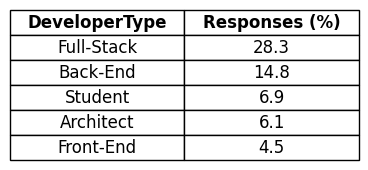

In [70]:
fig, ax = plt.subplots(figsize=(3,1))
ax.axis("off")

table = ax.table(cellText =result_mb.values, colLabels=result_mb.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)  # Adjust cell size

for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header row
        cell.get_text().set_fontweight('bold')
        
plt.show()

In [66]:
queryAI = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', '>=65') AS Age,
            Workexp as 'YrsOfExp',

            CASE 
                WHEN workexp between 1 and 3 then 'Junior Developer'
                when workexp between 3 and 6 then 'Mid-Level Developer'
                when workexp between 6 and 10 then 'Senior Developer'
                when workexp between 10 and 15 then 'Staff/Lead Developer'
                when workexp between 15 and 20 then 'Principal'
                when workexp between 20 and 30 then 'Distinguished Engineer/Fellow'
                when workexp between 30 and 60 then 'Veteran/Executive'
                else 'Not Valid'
            END AS 'Level',

            CASE
                WHEN LOWER(aiselect) LIKE '%every day%' 
                    OR LOWER(aiselect) LIKE '%daily%' THEN 'Daily'
                WHEN LOWER(aiselect) LIKE '%week%' THEN 'Weekly'
                WHEN LOWER(aiselect) LIKE '%month%' THEN 'Monthly'
                WHEN LOWER(aiselect) LIKE '%plan to soon%' THEN 'I plan to use AI soon'
                WHEN LOWER(aiselect) LIKE '%don''t plan%' 
                    OR LOWER(aiselect) LIKE '%never%' THEN 'I don''t plan to use AI'
                ELSE aiselect
            END AS AISelect, 

            replace(replace(aicomplex, 
            ' at handling complex tasks', ''), 
            'I don''t use AI tools for complex tasks / I don''t know' , 
            'I don''t use AI for complex tasks') as AIComplex, 
            
            aiacc, 
            
            aisent
    from data
    where aiselect is not null
    and aicomplex is not null
    and aiacc is not null
    and aisent is not null
    and Age != 'Prefer not to say'
    and workexp <= 60
"""
resultAI = con.sql(queryAI).df()
resultAI

,Age,YrsOfExp,Level,AISelect,AIComplex,AIAcc,AISent
0,25-34,8.0,Senior Developer,Monthly,Bad,Neither trust nor distrust,Indifferent
1,25-34,2.0,Junior Developer,Weekly,Bad,Neither trust nor distrust,Indifferent
2,35-44,10.0,Senior Developer,Daily,Neither good or bad,Somewhat trust,Favorable
3,35-44,4.0,Mid-Level Developer,Weekly,Bad,Somewhat trust,Favorable
4,35-44,21.0,Distinguished Engineer/Fellow,Weekly,"Good, but not great",Neither trust nor distrust,Favorable
...,...,...,...,...,...,...,...
30477,18-24,1.0,Junior Developer,Monthly,Neither good or bad,Somewhat trust,Favorable
30478,45-54,8.0,Senior Developer,Daily,Very well,Highly trust,Very favorable
30479,25-34,2.0,Junior Developer,Weekly,"Good, but not great",Somewhat distrust,Favorable
30480,45-54,29.0,Distinguished Engineer/Fellow,Daily,Neither good or bad,Somewhat distrust,Very favorable


In [22]:
order = ["Daily", "Weekly", "Monthly", "I plan to use AI soon", "I don't plan to use AI"]
order2 = ["Very well", "Good, but not great", "Neither good or bad", "Bad", "Very poor", "I don't use AI for complex tasks"]
order3 = ["18-24", "25-34", "35-44", "45-54", "55-64", ">=65"]
order4 = ["Highly trust", "Somewhat trust", "Neither trust nor distrust", "Somewhat distrust", "Highly distrust"]
order5 = ["Junior Developer", "Mid-Level Developer", "Senior Developer", "Staff/Lead Developer", "Principal", "Distinguished Engineer/Fellow", "Veteran/Executive"]

In [23]:
resultAI.to_csv("ai_use.csv")

In [24]:
# Hypothesis 1: There is no relationship between the age range (Age) of devs 
# and the frequency of AI usage (AISelect).

In [25]:
contigency = pd.crosstab(resultAI['Age'], resultAI['AISelect']).reindex(index=order3, columns=order)
display(contigency)

AISelect,Daily,Weekly,Monthly,I plan to use AI soon,I don't plan to use AI
Age,,,,,
18-24,1815,679,430,66,529
25-34,5334,1862,1323,384,1463
35-44,4503,1634,1264,463,1343
45-54,2087,819,672,334,701
55-64,700,317,318,243,474
>=65,159,84,120,103,259


In [26]:
from scipy.stats import chi2_contingency

In [27]:
chi2, p, dof, expected = chi2_contingency(contigency)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 1005.0097629895661
Degrees of Freedom: 20
P-value: 3.336070491952991e-200
Expected Frequencies:
 [[1685.26874877  622.82675021  476.44226101  183.90417295  550.55806706]
 [4964.33527984 1834.67521816 1403.46702972  541.73079194 1621.79168034]
 [4409.28370842 1629.54415721 1246.54842202  481.16104586 1440.46266649]
 [2209.19145725  816.45348074  624.56042911  241.07699626  721.71763664]
 [ 982.71425759  363.18286202  277.82310872  107.23823896  321.04153271]
 [ 347.20654813  128.31753166   98.15874943   37.88875402  113.42841677]]


In [28]:
# The null hypothesis is rejected in this case (p-value < 0.05). 
# There is clearly a relationship between developers' age and the frequency that they use AI for daily tasks.

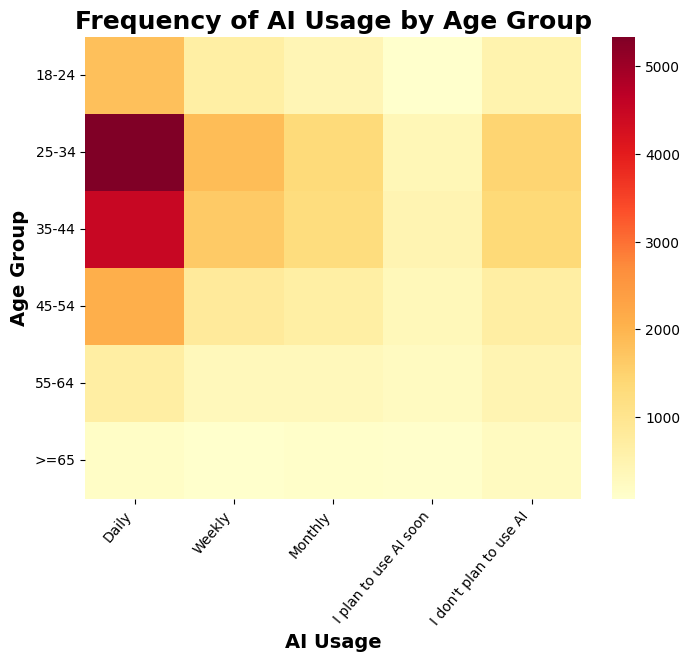

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(contigency, annot=False, fmt="d", cmap="YlOrRd")

plt.title("Frequency of AI Usage by Age Group", fontsize = 18, fontweight = 'bold')
plt.ylabel("Age Group", fontsize = 14, fontweight = 'bold')
plt.xlabel("AI Usage", fontsize = 14, fontweight = 'bold')

plt.xticks(rotation=50, ha="right")   # rotate x-axis labels
plt.yticks(rotation= 360)

plt.show()

In [30]:
# This figure shows that a large proportion of developers from 18 to 54 use AI tools as a part of their daily tasks.
# Those between 25-44 years of ageage, who are mid to senior-level workers.
# They might utilize AIs for writing tasks, especially the ones who are older, 
# as they are likely to have enough technical experience to not fully rely on AI.
# Writing on the other hands, is a challenge for most developers.

In [31]:
#Hypothesis 2: There is no association between 
# the frequency of AI usage (AISelect) and 
# the complexity of AI in handling complex tasks (AIComplex) that devs find.

In [32]:
contigency2 = pd.crosstab(resultAI['AISelect'], resultAI['AIComplex']).reindex(index=order, columns=order2)
display(contigency2)

AIComplex,Very well,"Good, but not great",Neither good or bad,Bad,Very poor,I don't use AI for complex tasks
AISelect,,,,,,
Daily,1058,5554,2424,3451,1759,352
Weekly,99,1327,943,1651,1047,328
Monthly,64,549,606,1157,1212,539
I plan to use AI soon,29,205,223,229,172,735
I don't plan to use AI,13,65,144,339,1149,3059


In [33]:
chi2, p, dof, expected = chi2_contingency(contigency2)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 14647.891689582826
Degrees of Freedom: 20
P-value: 0.0
Expected Frequencies:
 [[ 604.85775212 3687.5729939  2078.45023292 3269.4884194  2556.87691096
  2400.7536907 ]
 [ 223.53798963 1362.82068106  768.13529296 1208.30867397  944.9480021
   887.24936028]
 [ 170.99931107 1042.51361459  587.59858277  924.31694115  722.85456991
   678.71698051]
 [  66.00482252  402.40469785  226.80992061  356.78141198  279.01801063
   261.98113641]
 [ 197.60012466 1204.6880126   679.00597074 1068.10455351  835.3025064
   784.2988321 ]]


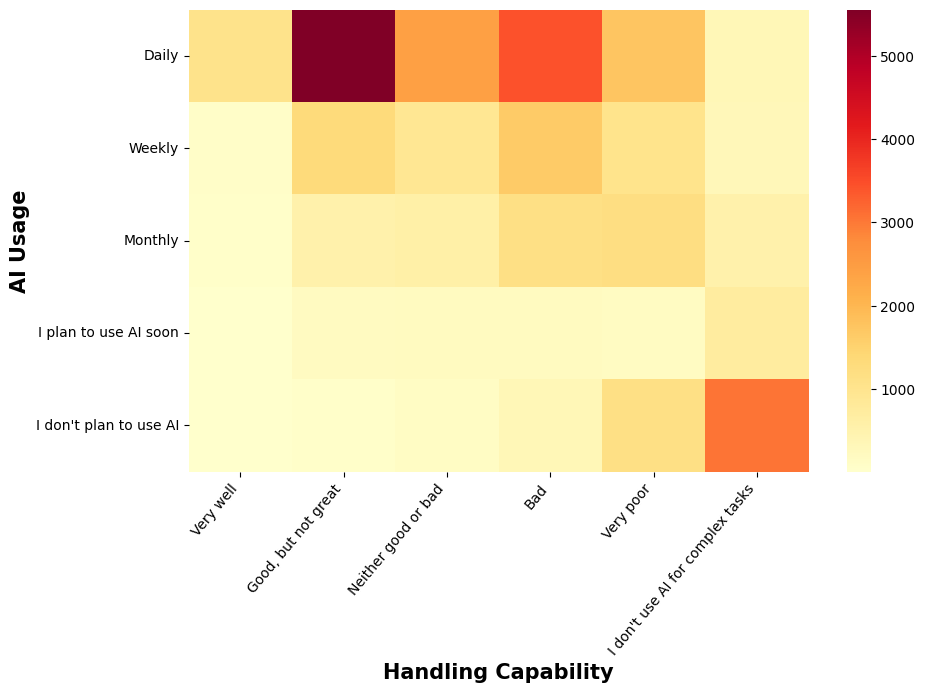

In [34]:
# Frequency of AI Usage by Complex-task Handling Capability
plt.figure(figsize=(10, 6))
sns.heatmap(contigency2, annot=False, fmt="d", cmap="YlOrRd")

plt.xlabel("Handling Capability", fontsize = 15, fontweight = 'bold')
plt.ylabel("AI Usage", fontsize = 15, fontweight = 'bold')

plt.xticks(rotation=50, ha="right")   # rotate x-axis labels
plt.yticks(rotation=0)

plt.show()

In [35]:
# Hypothesis 3: There is no association between the age range (Age) and 
# the degree to which developers trust AI (AIAcc).

In [36]:
contigency3 = pd.crosstab(resultAI['Age'], resultAI['AIAcc']).reindex(index=order3, columns=order4)
display(contigency3)

AIAcc,Highly trust,Somewhat trust,Neither trust nor distrust,Somewhat distrust,Highly distrust
Age,,,,,
18-24,106,1012,778,922,701
25-34,323,3168,2152,2707,2016
35-44,273,2758,1996,2373,1807
45-54,128,1369,1053,1224,839
55-64,53,587,443,562,407
>=65,23,182,184,180,156


In [37]:
chi2, p, dof, expected = chi2_contingency(contigency3)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 32.49665059129989
Degrees of Freedom: 20
P-value: 0.038285326821951425
Expected Frequencies:
 [[ 104.59333377 1047.7804606   762.63086412  919.86720031  684.1281412 ]
 [ 308.10301161 3086.47122892 2246.49944229 2709.67416836 2015.25214881]
 [ 273.65468145 2741.37956827 1995.32320714 2406.71137064 1789.9311725 ]
 [ 137.10970409 1373.5184043   999.72042517 1205.83898694  896.8124795 ]
 [  60.99048619  610.98195656  444.70546552  536.39315006  398.92894167]
 [  21.54878289  215.86838134  157.12059576  189.51512368  140.94711633]]


In [38]:
# # Hypothesis 3: There is no association between the age range (Age) and 
# the degree to which developers trust AI (AIAcc).

# Here we rejects the null hypethesis that there is no
# association between the devs' age range (Age) and how much they trust AI (AIAcc).
# As the p-value < 0.05 (p-value = 0.043), there is clearly a relationship between
# how old developers are and how much do they trust in artificial intelligence.

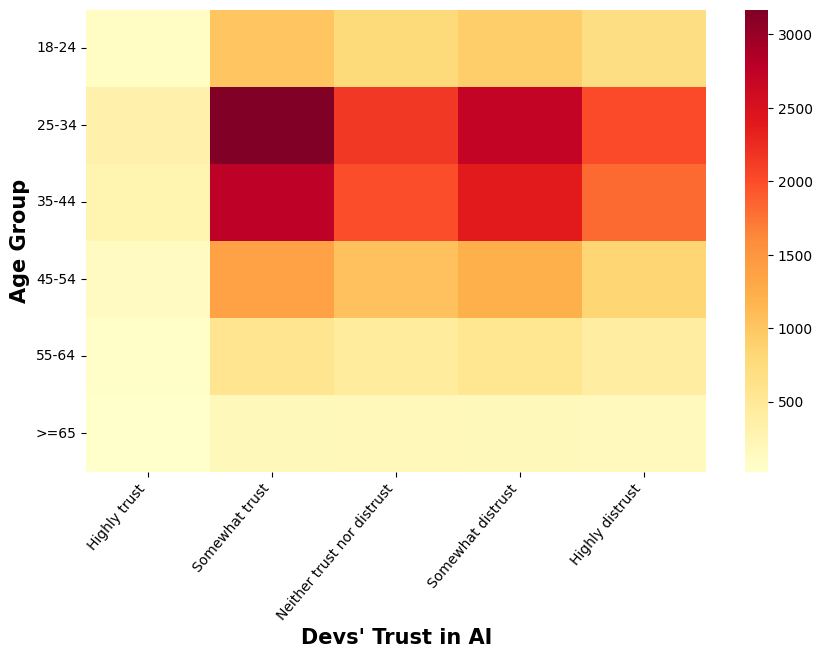

In [72]:
# Developers' AI Credibility by Age Group
plt.subplots(figsize=(10,6))
sns.heatmap(contigency3,annot=False, fmt="d", cmap="YlOrRd")

plt.xlabel("Devs' Trust in AI", fontsize = 15, fontweight = 'bold')
plt.ylabel("Age Group", fontsize = 15, fontweight = 'bold')

plt.xticks(rotation=50, ha="right")   # rotate x-axis labels
plt.yticks(rotation=0)

plt.show()

In [40]:
# Hypothesis 4: There is no relationship between devs' 
# years of experience (YrsOfExp) and the degree of complexity 
# that devs think AI can handle (AIComplex).

In [41]:
contigency4 = pd.crosstab(resultAI['Level'], resultAI['AIComplex']).reindex(index=order5, columns=order2)
display(contigency4)

AIComplex,Very well,"Good, but not great",Neither good or bad,Bad,Very poor,I don't use AI for complex tasks
Level,,,,,,
Junior Developer,206,1287,604,1117,858,634
Mid-Level Developer,206,1204,607,976,805,589
Senior Developer,242,1405,751,1320,1018,750
Staff/Lead Developer,195,1261,773,1149,933,817
Principal,141,918,560,821,673,604
Distinguished Engineer/Fellow,170,1116,725,1047,789,905
Veteran/Executive,103,509,320,397,263,714


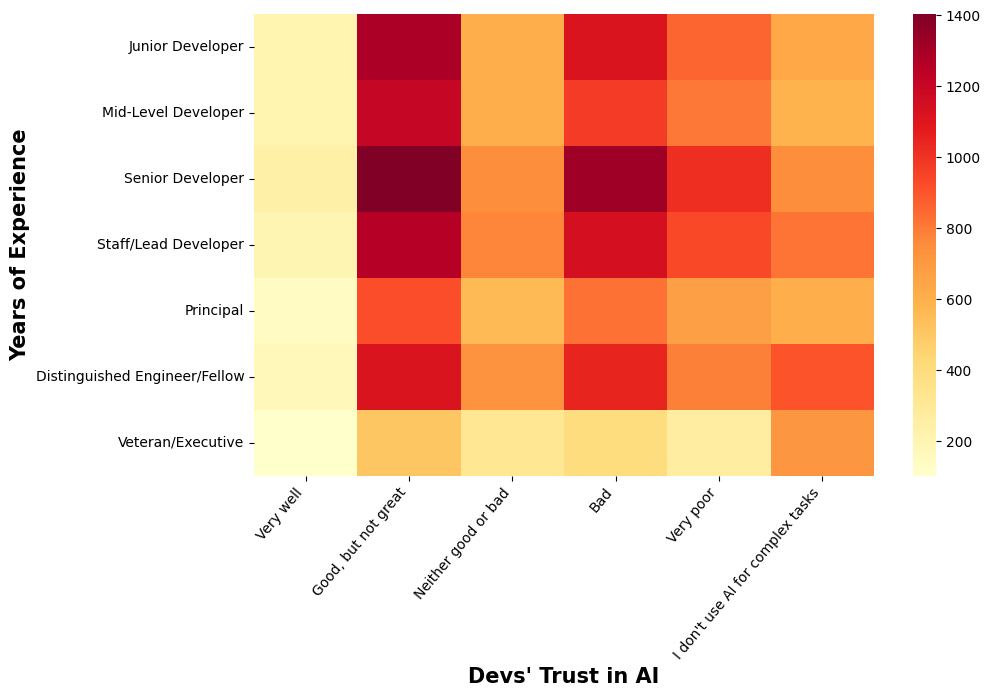

In [82]:
plt.subplots(figsize=(10,6))
sns.heatmap(contigency4,annot=False, fmt="d", cmap="YlOrRd")

plt.xlabel("Devs' Trust in AI", fontsize = 15, fontweight = 'bold')
plt.ylabel("Years of Experience", fontsize = 15, fontweight = 'bold')

plt.xticks(rotation=50, ha="right")   # rotate x-axis labels
plt.yticks(rotation=0)

plt.show()